In [53]:
import os
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
from datetime import datetime as dt
from streamlit_keplergl import keplergl_static
from IPython.display import HTML, display
from IPython.display import IFrame

In [54]:
path = r"C:\Users\ryani\Desktop\JupyterLab\NY_Citibike_2022"

In [55]:
df = pd.read_pickle(os.path.join(path, '02_Prepared_Data', 'new_merged_profile.pkl'))

In [56]:
# Create a month column 

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['month'] = df['date'].dt.month
df['month'] = df['month'].astype('int')

In [57]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,date,Precipitation,avgtemp,trips_per_day,tripduration,tripduration(mins),usertype,month
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,...,-73.945925,member,2022-01-21,0.0,-6.0,33598,528,9,member_electric_bike,1
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,...,-73.991160,member,2022-01-10,0.0,1.6,34727,649,11,member_classic_bike,1
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,...,-73.986831,member,2022-01-26,0.0,-2.3,42005,832,14,member_electric_bike,1
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,...,-73.986831,member,2022-01-03,0.0,1.4,33189,2102,35,member_classic_bike,1
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,...,-73.986831,member,2022-01-22,0.0,-5.9,31969,1234,21,member_classic_bike,1


In [58]:
df.shape

(29838806, 21)

In [59]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'Precipitation', 'avgtemp', 'trips_per_day',
       'tripduration', 'tripduration(mins)', 'usertype', 'month'],
      dtype='object')

In [60]:
## Groupby

df['value'] = 1 
df_groupby_bar = df.groupby('start_station_name', as_index=False).agg({'value': 'sum'})
top20 = df_groupby_bar.nlargest(20, 'value')

In [61]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value']))
fig.show()

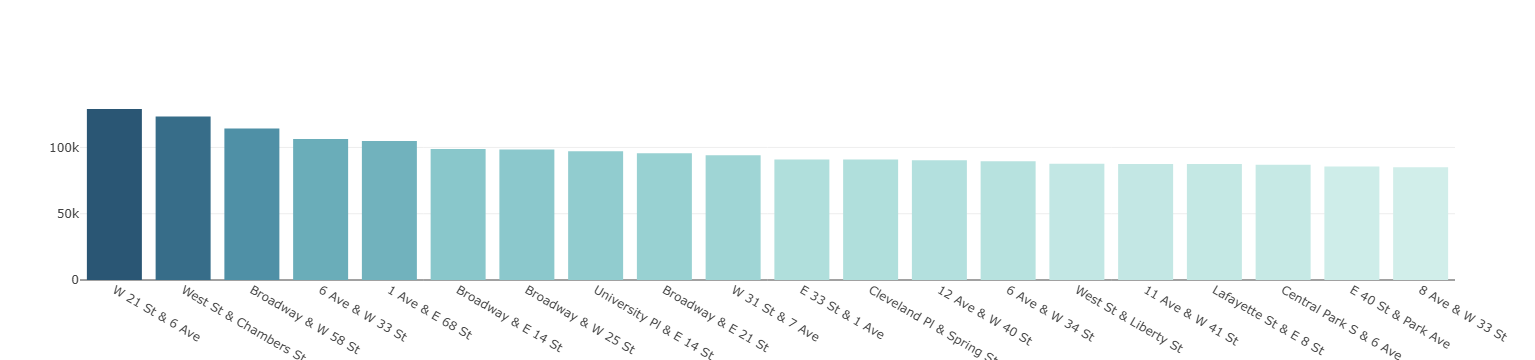

In [62]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker={'color': top20['value'],'colorscale': 'Teal'}))
fig.show()

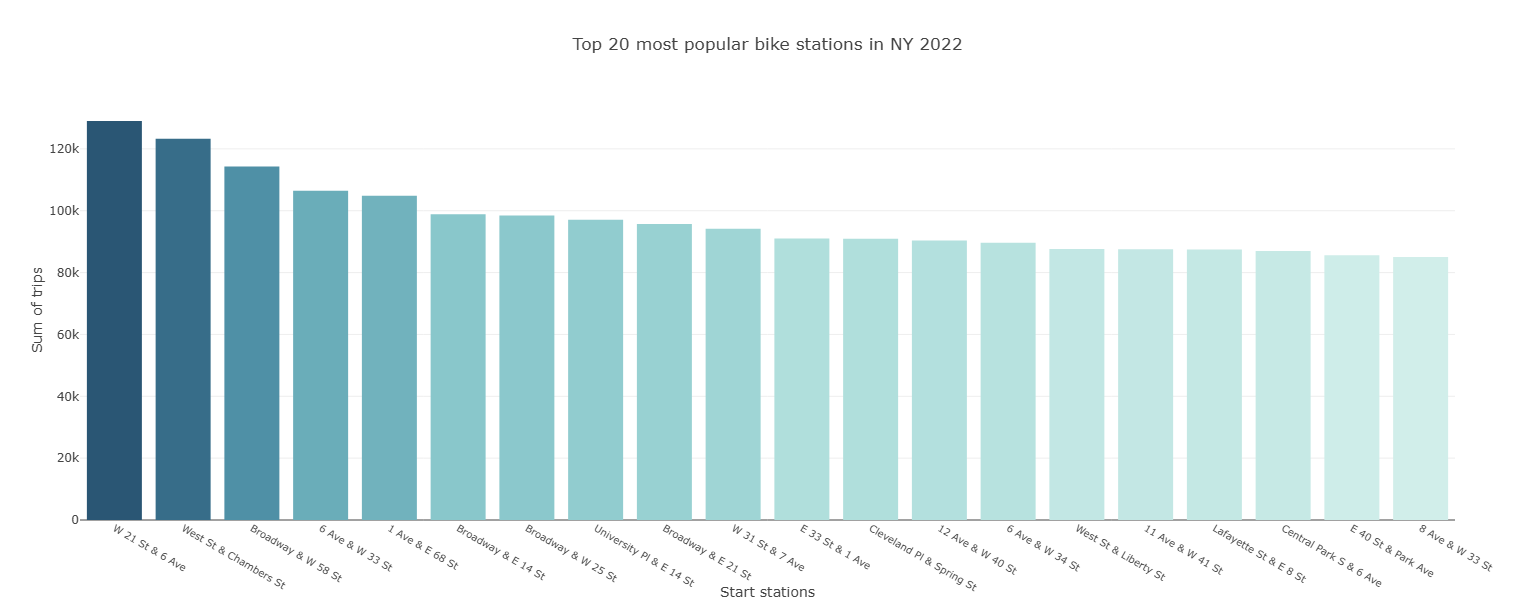

In [63]:
## Bar chart
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker={'color': top20['value'],'colorscale': 'Teal'}))
fig.update_layout(
    title='Top 20 most popular bike stations in NY 2022',
    xaxis_title='Start stations',
    yaxis_title='Sum of trips',
    width=900,
    height=600)
fig.update_xaxes(tickfont=dict(size=10))


In [48]:
df_red.shape

(2983881, 22)

In [49]:
df = df[df['date'] >= '2022-01-01']

In [50]:
# reduce ef size and keep reproducible results
df_red = df.sample(frac=0.1, random_state=42)
df_red.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,date,Precipitation,avgtemp,trips_per_day,tripduration,tripduration(mins),usertype,month,value
23031359,51561596962D6D34,classic_bike,2022-10-19 19:05:17.329,2022-10-19 19:10:58.132,Broadway & E 21 St,6098.10,E 9 St & 5 Ave,5872.10,40.739888,-73.989586,...,member,2022-10-19,0.0,10.0,99852,341,6,member_classic_bike,10,1
4214833,8EC10B67BE1C76F4,classic_bike,2022-04-13 14:57:39.816,2022-04-13 15:43:47.279,W 22 St & 8 Ave,6224.03,S 5 Pl & S 5 St,5125.03,40.744751,-73.999154,...,casual,2022-04-13,0.0,15.4,98764,2767,46,casual_classic_bike,4,1
27380825,D8E629127787A5D5,classic_bike,2022-11-12 16:07:20.481,2022-11-12 16:18:02.598,Little West St & 1 Pl,5001.08,South St & Gouverneur Ln,4953.04,40.705693,-74.016777,...,member,2022-11-12,2.3,19.7,113802,642,11,member_classic_bike,11,1
26400613,4FF2A3FCAC3D21C6,electric_bike,2022-11-09 07:24:23.803,2022-11-09 07:32:16.316,Morton St & West St,5772.07,Spruce St & Nassau St,5137.10,40.731480,-74.010915,...,member,2022-11-09,0.0,8.7,95500,473,8,member_electric_bike,11,1
28333068,0FCCB939FC94D28C,electric_bike,2022-12-29 14:49:21.643,2022-12-29 14:54:01.034,Wadsworth Ave & W 179 St,8336.02,Broadway & W 165 St,8191.01,40.848467,-73.936064,...,member,2022-12-29,0.0,6.4,51674,279,5,member_electric_bike,12,1


In [51]:
df.to_pickle(os.path.join(path, '02_Prepared_Data', 'final_df.pkl'))

In [52]:
df_red.to_csv(os.path.join(path, '02_Prepared_Data', 'reduced_df.csv'))

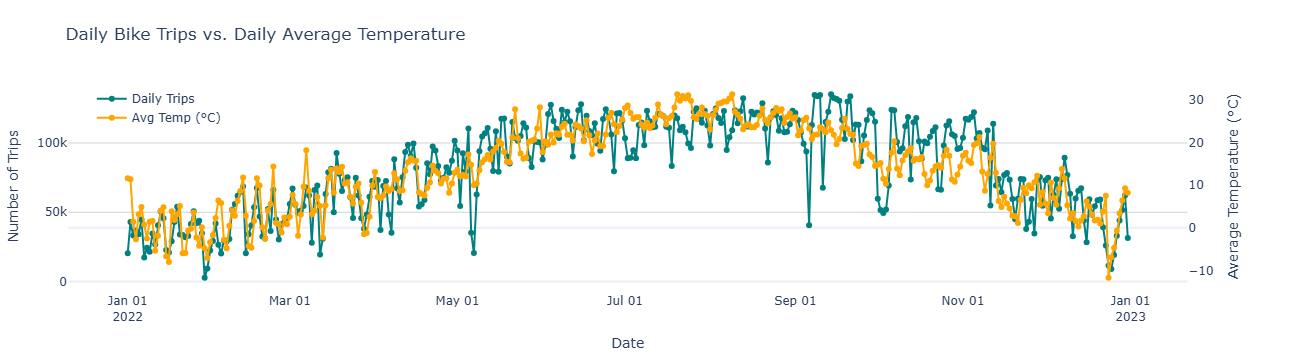

In [35]:
# Prepare data as per day
daily = (
    df.groupby('date')
      .agg(
          trips_per_day=('ride_id', 'count'),
          avgtemp=('avgtemp', 'mean')
      )
      .reset_index()
)

# Build a subplot with a secondary y-axis
fig_2 = make_subplots(specs=[[{"secondary_y": True}]])

# Add daily trips trace on primary y-axis (teal)
fig_2.add_trace(
    go.Scatter(
        x=daily['date'],
        y=daily['trips_per_day'],
        mode='lines+markers',
        name='Daily Trips',
        line=dict(color='teal'),
        hovertemplate='%{x|%Y-%m-%d}<br>Trips: %{y}<extra></extra>'
    ),
    secondary_y=False
)

# Add average temperature trace on secondary y-axis (orange)
fig_2.add_trace(
    go.Scatter(
        x=daily['date'],
        y=daily['avgtemp'],
        mode='lines+markers',
        name='Avg Temp (°C)',
        line=dict(color='orange'),
        hovertemplate='%{x|%Y-%m-%d}<br>Temp: %{y}°C<extra></extra>'
    ),
    secondary_y=True
)

# Update axes labels and layout
fig_2.update_xaxes(
    title_text="Date",
    tickformat="%b %d\n%Y",
    showgrid=False,
    rangeslider_visible=True
)

fig_2.update_yaxes(
    title_text="Number of Trips",
    secondary_y=False,
    showgrid=True,
    gridcolor='lightgray'
)
fig_2.update_yaxes(
    title_text="Average Temperature (°C)",
    secondary_y=True,
    showgrid=False
)

fig_2.update_layout(
    title="Daily Bike Trips vs. Daily Average Temperature",
    legend=dict(x=0.02, y=0.98),
    margin=dict(l=50, r=50, t=80, b=50),
    template="plotly_white"
)

# 6. Render the chart
fig_2.update_xaxes(rangeslider_visible=False)
fig_2.show()

In [ ]:
import gc # this is a garbage collector
gc.collect()

In [ ]:
# Save the top 20 stations as a csv file 

top20.to_csv(os.path.join(path, '02_Prepared_Data','top20.csv'))